# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{Long-Short Term Memory:LSTM }}$</center>


${\textbf{Abstract}}$
The purpose of this research is to investigate the influence of climate change on GroundWater Level (GWL)  in  Mornag plain in Tunisia. Indeed, due to the spatiotemporal variability of RainFall (RF) and temperature, aquifers all over the world have seen significant water level volatility in recent decades. Therefore, for a reliable GroundWater (GW) management under climate change context, it is essential to analyze and estimate the GWL variability. In this study, we focus on the plain of Mornag, located in the southeast of Tunisia, since it contributes with 33% in the national agricultural production. From this plain, we have collected historical piezometric and RF data covering the period 2005-2015. Knowing the RF data, our goal is to forecast the GWL one. This issue has already been studied using classical numerical GW  modeling such as Modflow and Feflow. Unfortunately, these techniques are data and time consuming. To overcome all these drawbacks, we propose to use an Artificial Intelligence (AI) approach that  has shown great performance in literature for recurrent data modeling and forecasting. This approach corresponds to the Long-Short Term Memory (LSTM) Neural Network. Compared with Modflow, LSTM has shown noticeable enhancement in terms of root mean squared error minimization,  which confirms its  adequacy for GWL forecasting. Using the proposed AI prediction model, the impact of climate change on Mornag GWL has been studied under two Representative Concentration Pathway (RCP) scenarios; RCP 4.5 and RCP 8.5 for three future periods: 2015-2040 (short term), 2041-2065 (medium term) and 2066-2100 (long term). As expected, results reveal a future decline of Mornag GWL. The performed study of future Mornag GWL behavior using LSTM  could classify this AI approach  as a good decision support system that could be used to optimize the management of our limited water resources in order to satisfy the population needs in terms of drinking water and agricultural production, as well as to prevent upcoming drought.

${\textbf{Long Short-Term Memory (LSTM) }}$networks are an improved version of the traditional Recurrent Neural Networks (RNNs)that are frequently used to handle sequential data, such as time series. <br>
As stated in the literature, RNNs suffer from the vanishing gradient problem during backpropagation, where the gradient gets less and less with every layer, during the network training, until it is too small to reach the deepest levels. This drawback makes basic RNN memory unable to learn past information. <br>
Alternatively, LSTMs came to recall long-term dependencies since they were specifically developed to address this issue. With LSTM, training errors retain their values, which overcomes the vanishing gradient problem and allows learning from sequences hundreds of timesteps long . The initial LSTM model consists of a single hidden LSTM layer that could be composed of several Memory Blocks (MBs). A MB like depicted in Fig. 2. (B), which is composed of 3 sigmoid (σ) separate network layers and one hyperbolic tangent (Tanh) one, corresponds to the key contribution of the LSTM neural network, since the decision to consider or throw away information is taken inside. Indeed, the LSTM MB has three gates to govern the information flow; for a given time 𝑡, coupling the input 𝑥 and the 𝑡 output of the previous hidden state ℎ , the forget gate regulates which and how much cell information is 𝑡−1 𝑓 𝑡 forgotten, the input gate 𝑖 controls which inputs are used to update the old cell state (convoying important 𝑡 information) 𝑐 , into the new cell state and as for the output gate it defines which cell memory elements 𝑡−1 𝑐 𝑡 𝑜 𝑡 are used to update the hidden state ℎ of the LSTM cell . <br>
Using a unique LSTM model as initially developed, the past information stored inside a sequence is barely captured. Alternatively, one could use the stacked LSTM which is a model expansion that involves several hidden LSTM layers, with many MBs for each of them, enhancing the ability to capture more complicated associations in the dataset. Based on experimentation, in this paper, we propose the stacked LSTM architecture illustrated in Fig. 2. (A) for which two LSTM layers are used, each one consists of 50 MBs. <br>
As input, our stacked LSTM model uses 30 timesteps of the encoded sequence X1 to X12 corresponding to our 12 features. The stacked LSTM is followed by a dropout layer in order to reduce overfitting while improving model performance. Finally, we add a Fully-Connected (FC) layer giving rise to the output layer, denoted by Y and corresponding to the GWL in our study.<br>

<center><img src="../Images/LSTM.png" width="800" height="400"><center>
<center>Illustration of the proposed LSTM Network architecture for GWL forecasting<center><br>

${\textbf{Importing Libraries}}$

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
import time

In [4]:
from matplotlib import pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [6]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  GridSearchCV

${\textbf{Loading data from modeling}}$

In [8]:
HistoricalData = pd.read_pickle('.././Pickles/HistoricalData/HistoricalData.pkl')
HistoricalData.index=HistoricalData.Time
del HistoricalData["Time"]

In [9]:
del HistoricalData['Semester']
del HistoricalData['Trimester']
del HistoricalData['Mensual']

In [10]:
HistoricalData.columns

Index(['PZ', 'RG', 'Zone', 'Lat', 'Lon', 'Year', 'Month', 'SPI',
       'SPI_Category', 'RFd', 'RFm', 'RFt', 'RFs', 'RFy', 'GWL'],
      dtype='object')

In [11]:
column=['GWL', 'RFm', 'RFt', 'RFs', 'RFy','PZ', 'RG', 'Zone', 'Year', 'Month', 'SPI',
       'SPI_Category']#Reindexing
HistoricalData=HistoricalData.reindex(column, axis='columns')

In [12]:
HistoricalData

,GWL,RFm,RFt,RFs,RFy,PZ,RG,Zone,Year,Month,SPI,SPI_Category
Time,,,,,,,,,,,,
2005-09-01,5.411000,23.6,23.6,212.7,212.7,Ben Zazia,BEN AROUS I MUNICIPA,4,2005,9,-0.236898,Moderately dry
2005-09-01,9.690000,23.6,23.6,212.7,212.7,Fraj,BEN AROUS I MUNICIPA,4,2005,9,-0.236898,Moderately dry
2005-09-01,7.503583,23.6,23.6,212.7,212.7,Bir El Kif,BEN AROUS I MUNICIPA,4,2005,9,-0.236898,Moderately dry
2005-09-01,3.645192,23.6,23.6,212.7,212.7,El Attar,BEN AROUS I MUNICIPA,4,2005,9,-0.236898,Moderately dry
2005-09-01,1.900000,23.6,23.6,212.7,212.7,Majoul,BEN AROUS I MUNICIPA,4,2005,9,-0.236898,Moderately dry
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-01,16.681000,0.0,0.0,203.0,265.0,UCP Ouzra,OUZRA AGRI FLORA,1,2015,4,-0.236898,Moderately dry
2015-04-01,28.783000,0.0,0.0,203.0,265.0,Salah Khamar,OUZRA AGRI FLORA,1,2015,4,-0.236898,Moderately dry
2015-04-01,18.217970,0.0,0.0,203.0,265.0,Haj Hadi Jani,OUZRA AGRI FLORA,1,2015,4,-0.236898,Moderately dry


In [13]:
lb_make = LabelEncoder()
HistoricalData["PZ"] = lb_make.fit_transform(HistoricalData["PZ"])
lb_make1 = LabelEncoder()
HistoricalData["RG"] = lb_make1.fit_transform(HistoricalData["RG"])
lb_make2 = LabelEncoder()
HistoricalData["SPI_Category"] = lb_make2.fit_transform(HistoricalData["SPI_Category"])

In [14]:
print(HistoricalData.shape)
HistoricalData.info()

(93600, 12)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93600 entries, 2005-09-01 to 2015-04-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GWL           93600 non-null  float64
 1   RFm           93600 non-null  float64
 2   RFt           93600 non-null  float64
 3   RFs           93600 non-null  float64
 4   RFy           93600 non-null  float64
 5   PZ            93600 non-null  int32  
 6   RG            93600 non-null  int32  
 7   Zone          93600 non-null  int64  
 8   Year          93600 non-null  int64  
 9   Month         93600 non-null  int64  
 10  SPI           93600 non-null  float64
 11  SPI_Category  93600 non-null  int32  
dtypes: float64(6), int32(3), int64(3)
memory usage: 8.2 MB


In [15]:
test_split=round(len(HistoricalData)*0.05)
test_split

4680

In [16]:
df_for_training=HistoricalData[:-test_split]
df_for_testing=HistoricalData[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(88920, 12)
(4680, 12)


In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.26471352, 0.07687297, 0.07687297, ..., 1.        , 0.        ,
        0.66666667],
       [0.33004076, 0.07687297, 0.07687297, ..., 1.        , 0.        ,
        0.66666667],
       [0.29666087, 0.07687297, 0.07687297, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.47294131, 0.16449511, 0.23941368, ..., 1.        , 0.01714286,
        0.33333333],
       [0.3469718 , 0.16449511, 0.23941368, ..., 1.        , 0.01714286,
        0.33333333],
       [0.57583854, 0.16449511, 0.23941368, ..., 1.        , 0.01714286,
        0.33333333]])

In [18]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [19]:
trainX,trainY=createXY(df_for_training_scaled,30)
testX,testY=createXY(df_for_testing_scaled,30)

In [20]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

trainX Shape--  (88890, 30, 12)
trainY Shape--  (88890,)
testX Shape--  (4650, 30, 12)
testY Shape--  (4650,)


In [21]:
trainX.shape[1],trainX.shape[2]

(30, 12)

In [22]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [23]:
# def build_model():
#     model = Sequential()
#     model.add(LSTM(128,return_sequences=True,input_shape=(30,12),recurrent_regularizer='l1_l2'))
#     model.add(LSTM(16))
#     model.add(Dropout(0.1))
#     model.add(Dense(1))
#     model.compile(loss=root_mean_squared_error, optimizer='adam')
#     return model
  
# grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))

# parameters = {'batch_size' : [32,64,256,512,1024],
#               'epochs' : [16,32,64],
#              }

# grid_search  = GridSearchCV(estimator = grid_model,
#                             param_grid = parameters,
#                             cv = 5)
# grid_result = grid_search.fit(trainX, trainY)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [24]:
epochs_num = 12
batch_size=256
# learning_rate = 0.0001
# decay_rate = 3 * learning_rate / epochs_num
# optimizer = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None,decay = decay_rate)

In [25]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(30,12),recurrent_regularizer='l1_l2'))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss=root_mean_squared_error, optimizer='adam')
start_time = time.time()
history=model.fit(trainX, trainY, epochs=epochs_num, batch_size=batch_size, verbose=1, validation_data=(testX,testY))
dt_timeLSTM= (time.time() - start_time)

Epoch 1/12
348/348 [==============================] - 10s 10ms/step - loss: 1.2767 - val_loss: 0.1322
Epoch 2/12
348/348 [==============================] - 3s 8ms/step - loss: 0.1639 - val_loss: 0.0956
Epoch 3/12
348/348 [==============================] - 3s 8ms/step - loss: 0.1172 - val_loss: 0.0824
Epoch 4/12
348/348 [==============================] - 3s 8ms/step - loss: 0.1046 - val_loss: 0.0756
Epoch 5/12
348/348 [==============================] - 3s 9ms/step - loss: 0.0960 - val_loss: 0.0595
Epoch 6/12
348/348 [==============================] - 3s 8ms/step - loss: 0.0900 - val_loss: 0.0591
Epoch 7/12
348/348 [==============================] - 3s 9ms/step - loss: 0.0826 - val_loss: 0.0699
Epoch 8/12
348/348 [==============================] - 3s 9ms/step - loss: 0.0752 - val_loss: 0.0669
Epoch 9/12
348/348 [==============================] - 3s 8ms/step - loss: 0.0678 - val_loss: 0.0601
Epoch 10/12
348/348 [==============================] - 3s 8ms/step - loss: 0.0635 - val_loss: 0.06

In [26]:
dt_timeLSTM

41.94701647758484

In [27]:
prediction=history.model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

146/146 [==============================] - 1s 3ms/step
prediction
 [[0.37378255]
 [0.57032144]
 [0.7521187 ]
 ...
 [0.44891703]
 [0.49965894]
 [0.7478181 ]]

Prediction Shape- (4650, 1)


In [28]:
prediction_copies_array = np.repeat(prediction,12, axis=-1)

In [29]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

In [30]:
original_copies_array = np.repeat(testY,12, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),12)))[:,0]

In [31]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [12.55513  25.428625 37.336525 ... 17.476515 20.800161 37.054832]

Original Values--  [10.799     25.79      36.093     ... 18.2179703 14.199     37.94     ]


In [32]:
np.sqrt(mean_squared_error(pred,original))

2.8339856872803755

<Figure size 864x864 with 0 Axes>

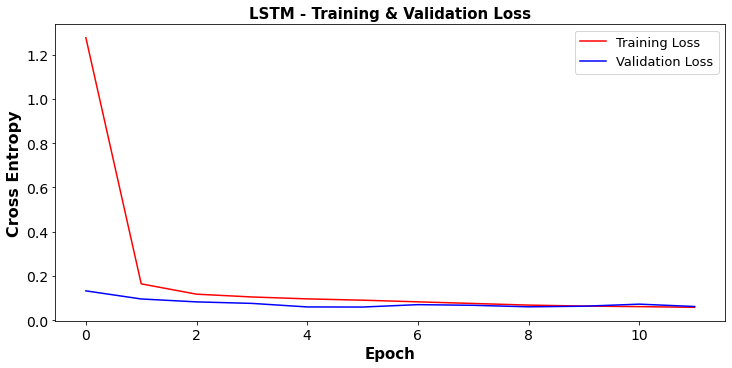

In [33]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 12))

# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy', color='r')
# plt.plot(val_acc, label='Validation Accuracy', color='b')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.legend(loc='lower right', fontsize=13)
# plt.ylabel('accuracy', fontsize=16, weight='bold')
# plt.title('LSTM - Training & Validation accuracy.', fontsize=16, weight='bold')

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Loss', fontsize=15, weight='bold')
# plt.yscale('log')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [35]:
history.model.save('.././Pickles/Models/LSTM_NN.h5')
np.save('.././Pickles/Models/history.npy',history.history)
# history=np.load('my_history.npy',allow_pickle='TRUE').item()
# Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('my_modelLSTM.h5')

# # Show the model architecture
# new_model.summary()